In [70]:
# Target density p*(x) = exp(-x^4 + 3x^2 - x)
# Proposal distribution N(x|mu, sigma)
# f(x) = x

In [71]:
mu, sigma = 1.2, 2
import numpy as np
samples = np.random.normal(mu, sigma, 1000)

In [72]:
def p(x):
    return np.exp((-1 * x**4) + (3 * x ** 2) - x)

def q(x, mu=mu, sigma=sigma):
    coeff = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return coeff * np.exp(exponent)
sum = 0
for x in samples:
    sum += p(x) / q(x) * x
expect = (1/len(samples)) * sum

print(expect)

-26.062701860495643


In [73]:
def weight_normalizer():
    sum = 0
    for x in samples:
        sum += p(x) / q(x)
    return sum

In [74]:
normalizer = weight_normalizer()
sum = 0
for x in samples:
    sum += ((p(x) / q(x)) / normalizer) * x
expect =sum

print(expect)

-0.968335635119527


Sampling-importance-resampling

In [75]:
normalizer = weight_normalizer()
weights = []
for x in samples:
    weights.append((p(x) / q(x)) / normalizer)
weights_probs = weights / np.sum(weights)

In [76]:
def weighted_choice(samples, weights_probs, size=len(samples), rng=None):
    if rng is None:
        rng = np.random.default_rng()
    weights_probs = np.array(weights_probs, dtype=float)
    probs = weights_probs / weights_probs.sum()
    picks = rng.choice(len(samples), size=len(samples), p=probs, replace=True)
    return [samples[i] for i in picks]


print(weighted_choice(samples, weights_probs, size=len(samples), rng=None))

[np.float64(-0.8633636094626931), np.float64(-1.413168219478946), np.float64(-1.7927015842837217), np.float64(-0.10333246231025472), np.float64(-0.5408478244934409), np.float64(-1.1243305606656058), np.float64(-0.959409370579545), np.float64(-1.4537966426970923), np.float64(0.8607346850043751), np.float64(1.3452042802149322), np.float64(-1.1209799229139608), np.float64(-1.4269853361942244), np.float64(1.4340881031583788), np.float64(-1.3086834239319443), np.float64(-1.2270182956237006), np.float64(-1.3086834239319443), np.float64(0.10965414074824342), np.float64(-1.0558046259372922), np.float64(-1.5514804190613651), np.float64(-1.2270182956237006), np.float64(-1.5514804190613651), np.float64(-0.6310496823778105), np.float64(-1.1166427797672933), np.float64(-1.2404230603304354), np.float64(-1.4844903962583158), np.float64(-1.3144831836076094), np.float64(-1.7927015842837217), np.float64(-0.8633636094626931), np.float64(-1.0757625717273955), np.float64(-1.3406155336100773), np.float64(1.

/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_42865/1527753372.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  p = p_star / np.trapz(p_star, grid)  # normalized for plotting


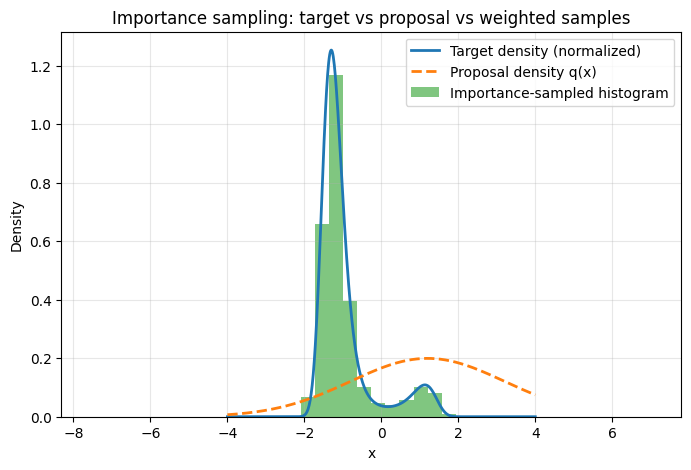

In [77]:
import matplotlib.pyplot as plt

# assumes you've already computed these elsewhere
# samples: array of draws generated from q(x)
# weights: importance weights proportional to p*(samples) / q(samples)
# mu, sigma: parameters of the proposal q(x) = N(mu, sigma^2)


def target_unnormalized(x):
    return np.exp(-(x**4) + 3 * x**2 - x)  # p*(x)


def proposal_pdf(x):
    coeff = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return coeff * np.exp(exponent)


grid = np.linspace(-4, 4, 600)
p_star = target_unnormalized(grid)
p = p_star / np.trapz(p_star, grid)  # normalized for plotting
q_vals = proposal_pdf(grid)

plt.figure(figsize=(8, 5))
plt.plot(grid, p, label="Target density (normalized)", lw=2)
plt.plot(grid, q_vals, label="Proposal density q(x)", lw=2, ls="--")

# weighted histogram of the samples
normalized_weights = weights / np.sum(weights)
plt.hist(
    samples,
    bins=40,
    weights=normalized_weights,
    density=True,
    alpha=0.6,
    label="Importance-sampled histogram",
)

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("Importance sampling: target vs proposal vs weighted samples")
plt.show()